가중치(w): -0.5675, 편향(b): 0.8421
에폭 [100/1000], 손실: 0.7342, 가중치(w): 1.9796, 편향(b): 1.0459
에폭 [200/1000], 손실: 0.7223, 가중치(w): 1.9956, 편향(b): 0.9393
에폭 [300/1000], 손실: 0.7179, 가중치(w): 2.0053, 편향(b): 0.8746
에폭 [400/1000], 손실: 0.7163, 가중치(w): 2.0112, 편향(b): 0.8352
에폭 [500/1000], 손실: 0.7157, 가중치(w): 2.0148, 편향(b): 0.8113
에폭 [600/1000], 손실: 0.7155, 가중치(w): 2.0170, 편향(b): 0.7967
에폭 [700/1000], 손실: 0.7154, 가중치(w): 2.0183, 편향(b): 0.7879
에폭 [800/1000], 손실: 0.7153, 가중치(w): 2.0192, 편향(b): 0.7825
에폭 [900/1000], 손실: 0.7153, 가중치(w): 2.0196, 편향(b): 0.7792
에폭 [1000/1000], 손실: 0.7153, 가중치(w): 2.0199, 편향(b): 0.7772
최적화된 가중치(w): 2.0199, 최적화된 편향(b): 0.7772


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}

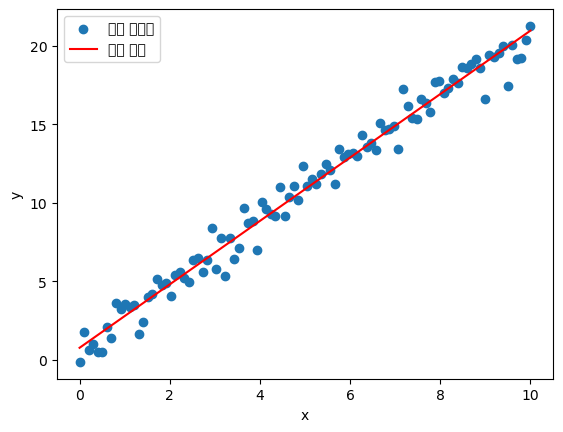

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 학습 데이터 생성
x = torch.linspace(0, 10, 100).unsqueeze(1)  # 입력 데이터
y = 2*x + 1 + torch.randn(100, 1)  # 정답 레이블 (기울기: 2, 절편: 1)

# 모델 정의
model = nn.Linear(1, 1)  # 선형 모델 (입력 차원: 1, 출력 차원: 1)

# 손실 함수 정의
criterion = nn.MSELoss()

# 옵티마이저 정의
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 학습
num_epochs = 1000  # 에폭 수

w = model.weight.item()
b = model.bias.item()
print(f'가중치(w): {w:.4f}, 편향(b): {b:.4f}')

for epoch in range(num_epochs):
    # Forward 계산
    outputs = model(x)
    
    # 손실 계산
    loss = criterion(outputs, y)
    
    # Backward 계산 및 경사 하강
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 중간 결과 출력
    if (epoch+1) % 100 == 0:
        w = model.weight.item()
        b = model.bias.item()
        print(f'에폭 [{epoch+1}/{num_epochs}], 손실: {loss.item():.4f}, 가중치(w): {w:.4f}, 편향(b): {b:.4f}')

# 최적화된 가중치(w)와 편향(b) 확인
w_opt = model.weight.item()
b_opt = model.bias.item()
print(f'최적화된 가중치(w): {w_opt:.4f}, 최적화된 편향(b): {b_opt:.4f}')

# 학습된 모델의 예측 결과 확인
predicted = model(x)

# 그래프 그리기
plt.scatter(x, y, label='실제 데이터')
plt.plot(x, predicted.detach().numpy(), color='red', label='예측 결과')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 그래프 그리기 실습